In [43]:
# This notebook provided a structured approach to perform Exploratory Data Analysis (EDA) on a dataset using a collection of utility functions. It's essential to adapt the examples given the nature and structure of your dataset for more accurate and insightful analyses.



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

import requests
import pandas as pd
import govcxanalyzer.data_preprocessing as dp
import govcxanalyzer.hypothesis_testing as ht
from govcxanalyzer import eda, utils
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from IPython import display
import warnings

import warnings
warnings.filterwarnings('default')


plt.rcParams['figure.figsize'] = 4,4
plt.style.use("fivethirtyeight")

from IPython import display

tp = utils.get_date_timestamp()
# printing datetimestampe
print(tp)



2023-08-28_06:13:38


In [44]:
df = pd.read_csv("../data/fake-omb-a11-survey-response-level-data.csv", 
)

# using functions for specific touchpoints data to create 
# additonal date columns for the year and date formatted as month-year
df = dp.make_date_touchpoints_df(df, datecol="CreatedAt")

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   ID                     639 non-null    object             
 1   UUID                   639 non-null    object             
 2   Satisfaction           639 non-null    int64              
 3   Trust/Confidence       639 non-null    int64              
 4   Effectiveness/Quality  639 non-null    int64              
 5   UserGroup              639 non-null    object             
 6   Years                  639 non-null    object             
 7   Region                 639 non-null    object             
 8   Ease/Simplicity        639 non-null    int64              
 9   Efficiency/Speed       639 non-null    int64              
 10  Equity/Transparency    639 non-null    int64              
 11  Helpfulness            639 non-null    int64              

In [45]:

#Checking Unique Values

cat_columns = df.select_dtypes(include=['object']).columns.tolist() # select categorical columns
display.display(eda.count_unique_values(df, cat_columns))

# # Checking Null Values - Null and Unique Values Visualization
# This function provides a gradient visualization for the percentage of null values for the firstcolumns:

display.display(eda.NullUnique(df))




,columns,cardinality
ID,ID,639
UUID,UUID,639
UserGroup,UserGroup,5
Years,Years,5
Region,Region,3
FreeText,FreeText,99
Page,Page,4
Referrer,Referrer,74
date,date,7


,Feature,NumUnique,NumNull,%Null
12,FreeText,100,540,84.510000
14,Page,5,29,4.540000
0,ID,639,0,0.000000
1,UUID,639,0,0.000000
16,year,2,0,0.000000
15,Referrer,74,0,0.000000
13,CreatedAt,551,0,0.000000
11,Helpfulness,5,0,0.000000
10,Equity/Transparency,5,0,0.000000
9,Efficiency/Speed,5,0,0.000000


In [46]:

import warnings
warnings.filterwarnings('ignore')

prof_report = eda.get_profile(df)


prof_report.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


In [47]:
## writing out to outputs folder

with open("../outputs/output_eda_profile_report_omb-a11.html", "w") as fout:
    fout.write(prof_report.to_html())

    

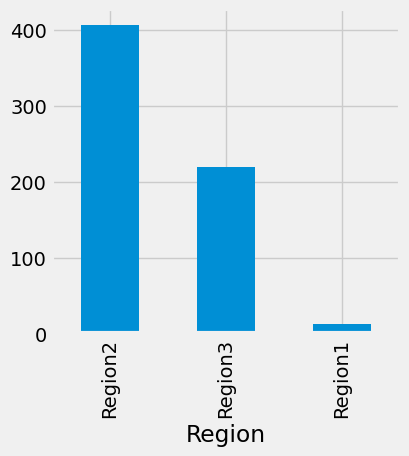

None

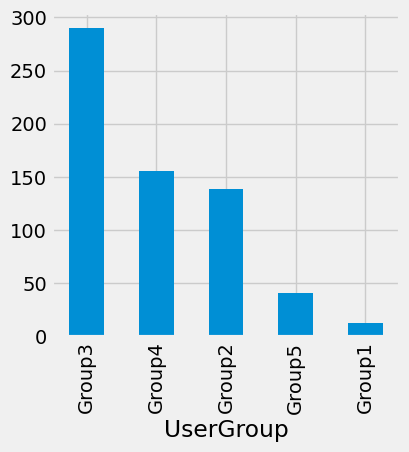

None

In [48]:
### Customer Segmentation Analysis 
# Visualizing Categorical Distributions
# For a sample categorical column:

for catcol in [ 'Region','UserGroup']:

    display.display(eda.visualize_cat_distributions(df, catcol))


In [49]:
cxdrivers = ['Satisfaction', 'Trust/Confidence',
       'Effectiveness/Quality',
       'Ease/Simplicity', 'Efficiency/Speed', 'Equity/Transparency',
       'Helpfulness',]


from constants import drivers2questions
from govcxanalyzer import eda, utils
for col in cxdrivers:
    print(col)

    print(drivers2questions.get(col))
    
    _ = ht.get_kruskal(df, "Region", col)
    _ = eda.make_segment_likert_table(df, usergroupcol="Region", likertcol=col)
    print()

Satisfaction
I am satisfied with the service I received from [service]
Kruskal
col: Region
target col:  Satisfaction
KruskalResult(statistic=14.594222188696442, pvalue=0.0006774931646436201)
N=639
++




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,3.250000,0.866025,2.0,3.0,3.0,4.0,5.0
1,Region2,407.0,3.977887,0.706760,1.0,4.0,4.0,4.0,5.0
2,Region3,220.0,3.877273,0.647039,2.0,4.0,4.0,4.0,5.0



Trust/Confidence
This interaction increased my confidence in [service provider]
Kruskal
col: Region
target col:  Trust/Confidence
KruskalResult(statistic=26.99991610235568, pvalue=1.3710165977092455e-06)
N=639
++




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,2.833333,0.834847,2.0,2.0,3.0,3.25,4.0
1,Region2,407.0,4.061425,0.783865,1.0,4.0,4.0,5.00,5.0
2,Region3,220.0,3.904545,0.749415,1.0,4.0,4.0,4.00,5.0



Effectiveness/Quality
My need was addressed.
Kruskal
col: Region
target col:  Effectiveness/Quality
KruskalResult(statistic=16.87150131564862, pvalue=0.00021697017466193667)
N=639
++




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,2.916667,1.083625,2.0,2.0,2.5,4.0,5.0
1,Region2,407.0,3.864865,0.867542,1.0,3.0,4.0,4.0,5.0
2,Region3,220.0,3.704545,0.727149,2.0,3.0,4.0,4.0,5.0



Ease/Simplicity
It was easy to complete what I needed to do.
Kruskal
col: Region
target col:  Ease/Simplicity
KruskalResult(statistic=21.93769506161275, pvalue=1.723018912816717e-05)
N=639
++




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,1.333333,0.651339,1.0,1.0,1.0,1.25,3.0
1,Region2,407.0,2.663391,1.067759,1.0,2.0,2.0,3.00,5.0
2,Region3,220.0,2.472727,0.846255,1.0,2.0,2.0,3.00,5.0



Efficiency/Speed
It took a reasonable amount of time to do what I needed to do.
Kruskal
col: Region
target col:  Efficiency/Speed
KruskalResult(statistic=27.961714374693333, pvalue=8.475998501490803e-07)
N=639
++




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,1.583333,0.996205,1.0,1.0,1.0,2.0,4.0
1,Region2,407.0,2.953317,1.140513,1.0,2.0,3.0,4.0,5.0
2,Region3,220.0,2.600000,0.938278,1.0,2.0,2.0,3.0,5.0



Equity/Transparency
I understood what was being asked of me throughout the process.
Kruskal
col: Region
target col:  Equity/Transparency
KruskalResult(statistic=27.30632416821281, pvalue=1.176270069278624e-06)
N=639
++




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,1.333333,0.492366,1.0,1.0,1.0,2.0,2.0
1,Region2,407.0,2.690418,0.996289,1.0,2.0,3.0,3.0,5.0
2,Region3,220.0,2.468182,0.829747,1.0,2.0,2.0,3.0,5.0



Helpfulness
The [service] helped me do what I needed to do.
Kruskal
col: Region
target col:  Helpfulness
KruskalResult(statistic=3.4518391782878712, pvalue=0.17800928108116232)
N=639




,Region,count,mean,std,min,25%,50%,75%,max
0,Region1,12.0,2.250000,1.138180,1.0,1.0,2.0,3.0,4.0
1,Region2,407.0,2.808354,1.001294,1.0,2.0,3.0,4.0,5.0
2,Region3,220.0,2.727273,0.895540,1.0,2.0,3.0,3.0,5.0


In [50]:
## For 6 out of the 7 drivers, statistically significant pvalue with kruskal wallis test